In [3]:
# Task 3: Car Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
car = pd.read_csv(r"C:\Users\DCO-AP 2\Downloads\car data.csv")

In [9]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
print(f'Rows = {car.shape[0]}\n')
print(f'Columns = {car.shape[1]}')

Rows = 301

Columns = 9


In [22]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [24]:
car.duplicated().sum()

2

In [26]:
missing = car.isnull().sum()
print(missing)

print('\n There is no missing values in the dataset')

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

 There is no missing values in the dataset


In [28]:
# duplicate values
duplicates = car.duplicated().sum()
print(f"Number of duplicate rows = {duplicates}")

# drop duplicates
print("After dropping duplicates")
car.drop_duplicates(inplace=True)
print(f"Number of duplicate rows = {car.duplicated().sum()}")

Number of duplicate rows = 2
After dropping duplicates
Number of duplicate rows = 0


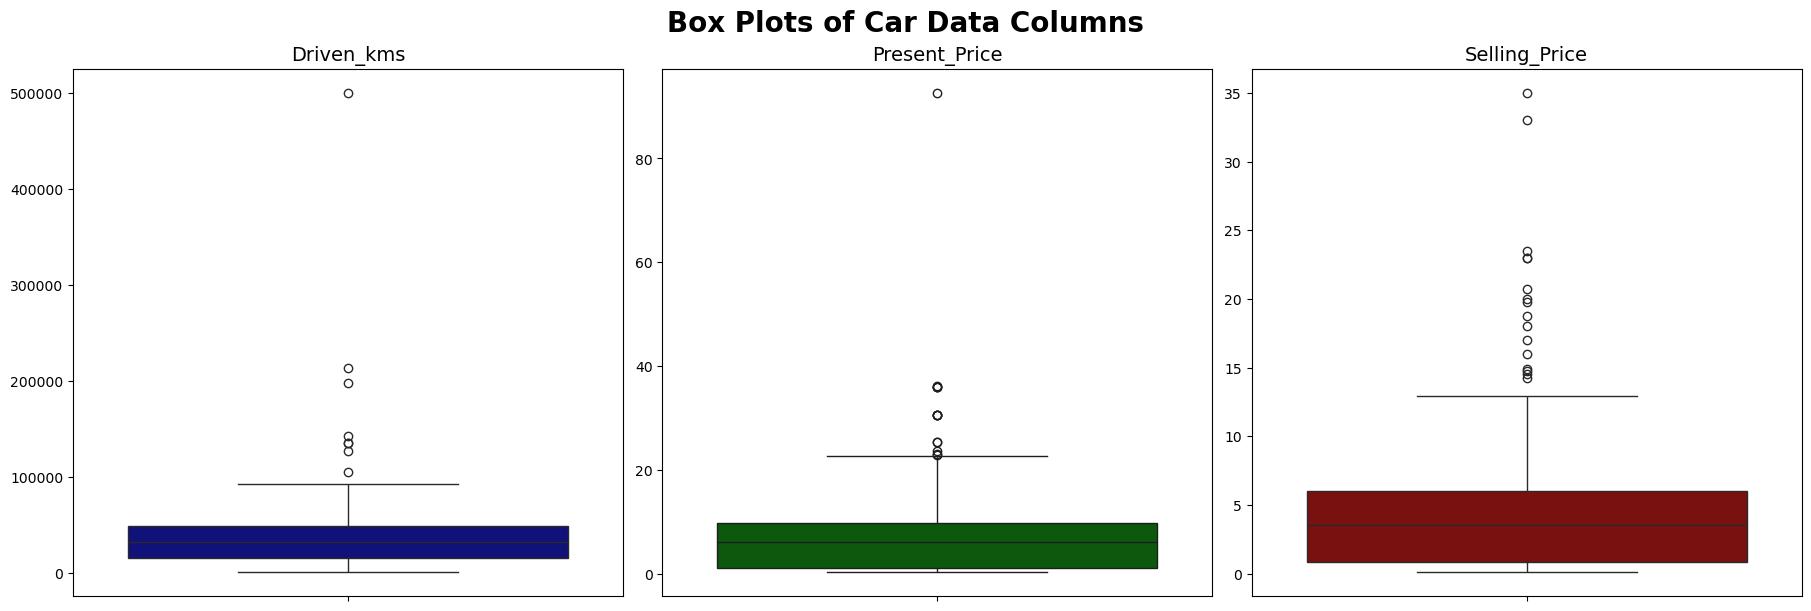

In [30]:
# Set up the figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Create individual box plots using Seaborn
sns.boxplot(ax=axes[0], y=car['Driven_kms'], color='darkblue', showfliers=True)
axes[0].set_title('Driven_kms', fontsize=14)
axes[0].set_ylabel("")  # Remove y-axis label to match uniformity

sns.boxplot(ax=axes[1], y=car['Present_Price'], color='darkgreen', showfliers=True)
axes[1].set_title('Present_Price', fontsize=14)
axes[1].set_ylabel("")

sns.boxplot(ax=axes[2], y=car['Selling_Price'], color='darkred', showfliers=True)
axes[2].set_title('Selling_Price', fontsize=14)
axes[2].set_ylabel("")

# Add a global title for the figure
fig.suptitle('Box Plots of Car Data Columns', fontsize=20, weight='bold')
plt.show()

Skewness of Selling_Price: 2.536521826497541


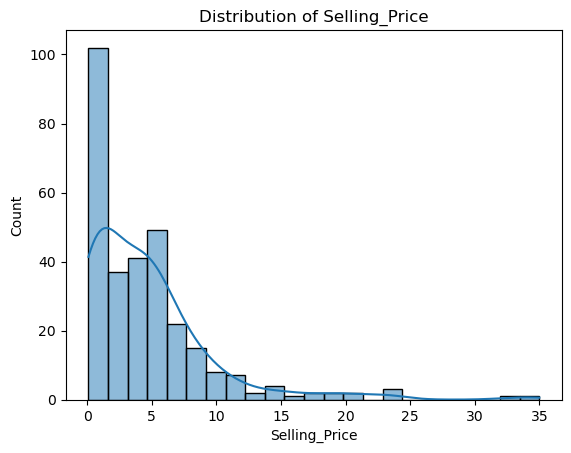

In [32]:
# Calculate skewness
skewness = car['Selling_Price'].skew()
print(f'Skewness of Selling_Price: {skewness}')

# Plot the distribution of Selling_Price
sns.histplot(car['Selling_Price'], kde=True)
plt.title('Distribution of Selling_Price')
plt.show()

In [34]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [42]:
car_filP =  car[car['Fuel_Type'] == 'Petrol']
car_filD =  car[car['Fuel_Type'] == 'Diesel']

In [44]:
car_filD.shape

(58, 9)

In [46]:
car_filP.shape

(239, 9)

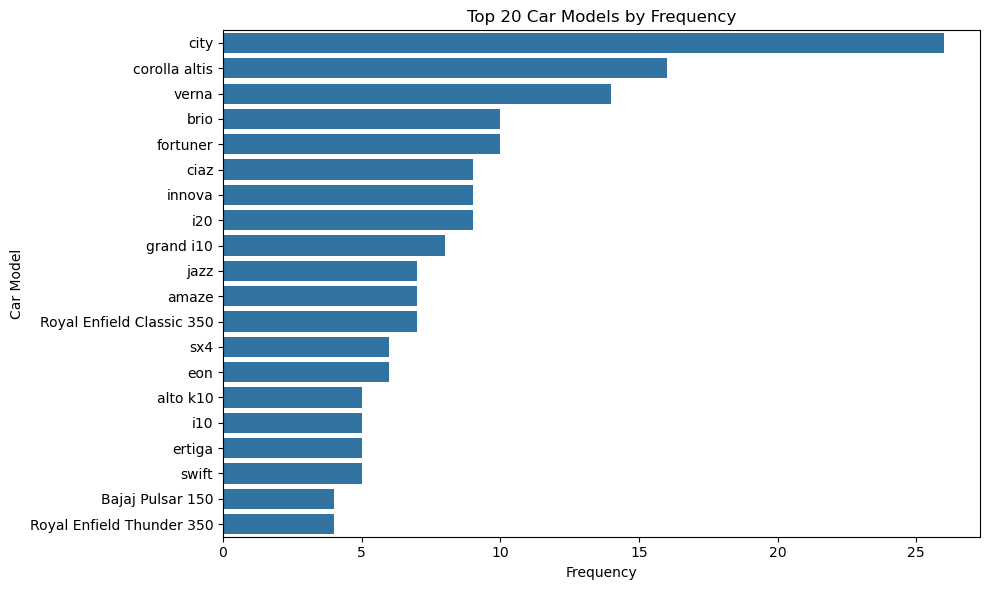

In [48]:
n = 20  # Number of top car models to plot
top_car_models = car['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [50]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [52]:
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

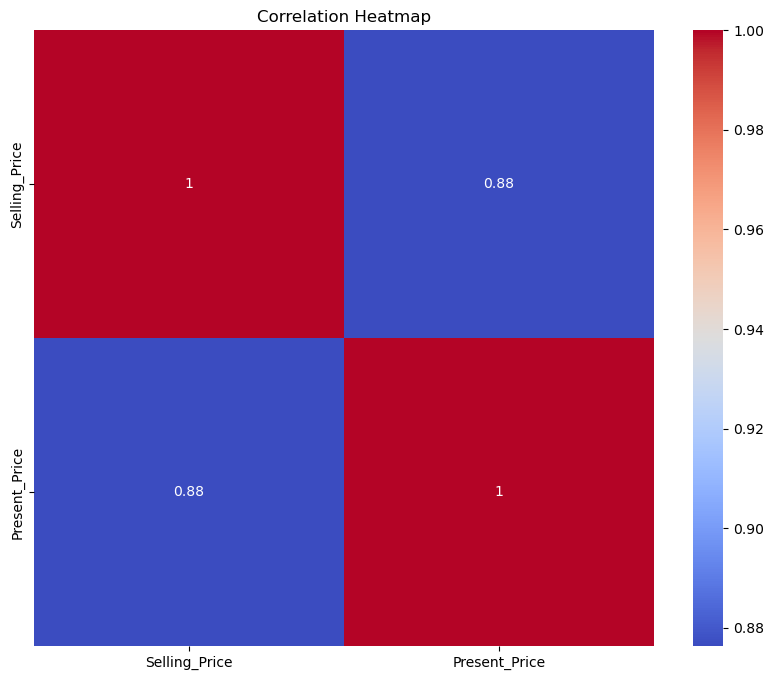

In [54]:
# numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']
numerical_features = ['Selling_Price', 'Present_Price', ]

correlation_matrix = car[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [56]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [68]:
# # Splitting the dataset
# X = car.drop([ 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
#        'Fuel_Type'], axis=1)  # Include the engineered features and CarName
# y = car['Present_Price']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model training
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

In [62]:
car.shape

(299, 9)

In [70]:
car.head()
car.info()
car.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [72]:
null_values = car.isna().sum()
print(null_values)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


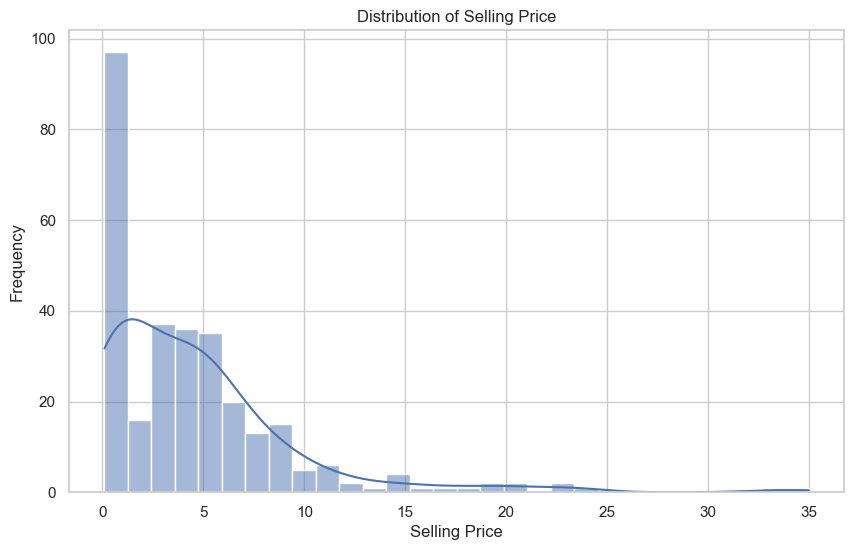

In [74]:
# Setting a style for all plots
sns.set(style="whitegrid")

# 1. Distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(car['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [76]:
# Separate the features and target variable
X = car.drop(columns=['Selling_Price'])  # Features
y = car['Selling_Price']                 # Target variable

In [78]:
# Identify categorical and numerical columns
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

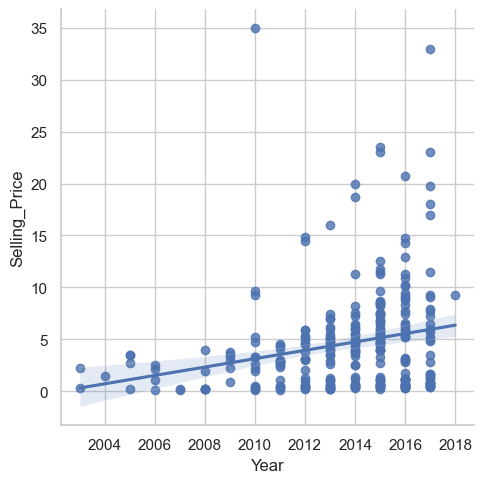

In [82]:
sns.lmplot(x="Year", y="Selling_Price", data=car)
plt.show()

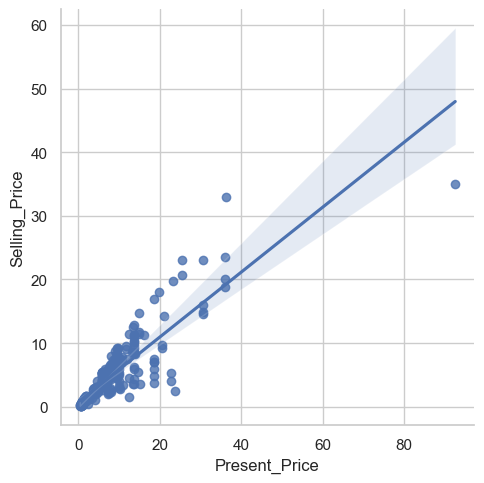

In [83]:
sns.lmplot(x='Present_Price',y="Selling_Price",data=car)

In [84]:
car['Price_difference']=car['Present_Price'] - car['Selling_Price']
car.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Price_difference
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [86]:
max_dif = car['Price_difference'].idxmax()
print(max_dif)

86


In [87]:
max_dif_car = car.loc[max_dif,"Car_Name"]
max_dif_year = car.loc[max_dif,"Year"]
max_dif_sp = car.loc[max_dif,"Selling_Price"]
max_dif_st = car.loc[max_dif,"Selling_type"]
print('the most price difference car was ',max_dif_car,'and it was sold in',max_dif_year, "with",max_dif_sp,'by a',max_dif_st )

the most price difference car was  land cruiser and it was sold in 2010 with 35.0 by a Dealer


In [88]:
car["Year"].max()

2018

In [89]:
model = LinearRegression()

In [96]:
X = car["Year"].values.reshape(-1, 1)
model.fit(X, car.Selling_Price)

LinearRegression()

In [97]:
next_10_years = np.arange(2024,2034).reshape(-1,1)
predicted_prices = model.predict(next_10_years)
for year, price in zip(next_10_years.flatten(), predicted_prices):
    print(f"Year: {year}, Predicted Price: {price}")

Year: 2024, Predicted Price: 8.777197116606203
Year: 2025, Predicted Price: 9.180444117529078
Year: 2026, Predicted Price: 9.583691118451839
Year: 2027, Predicted Price: 9.9869381193746
Year: 2028, Predicted Price: 10.39018512029736
Year: 2029, Predicted Price: 10.793432121220235
Year: 2030, Predicted Price: 11.196679122142996
Year: 2031, Predicted Price: 11.599926123065757
Year: 2032, Predicted Price: 12.003173123988631
Year: 2033, Predicted Price: 12.406420124911392


In [100]:
year = np.array([[2019]])
model.predict(year)

array([6.76096211])

In [102]:
car['Selling_Price'].max()

35.0